In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#---------------------US Data
US_COVID_Cases = pd.read_csv("https://raw.githubusercontent.com/rmikula-gmu/cs504_test1_medium_tutorial/main/CS504%20Final%20Datasets%20Revised/US%20COVID%20Data.csv")
US_Stimulus = pd.read_csv("https://raw.githubusercontent.com/rmikula-gmu/cs504_test1_medium_tutorial/main/CS504%20Final%20Datasets%20Revised/DOL%20US%20Claims%20Data.csv")
US_Unemployment = pd.read_csv("https://raw.githubusercontent.com/rmikula-gmu/cs504_test1_medium_tutorial/main/CS504%20Final%20Datasets%20Revised/US%20Unemp%20Data.csv")
US_Master_data = pd.read_csv("https://raw.githubusercontent.com/rmikula-gmu/cs504_test1_medium_tutorial/main/CS504%20Final%20Datasets%20Revised/US%20Master%20Dataset.csv")
#---------------------Canada Data
Canada_COVID_Cases = pd.read_csv("https://raw.githubusercontent.com/rmikula-gmu/cs504_test1_medium_tutorial/main/CS504%20Final%20Datasets%20Revised/Canada%20COVID%20Data.csv")
Canada_Stimulus = pd.read_csv("https://raw.githubusercontent.com/rmikula-gmu/cs504_test1_medium_tutorial/main/CS504%20Final%20Datasets%20Revised/Canadian%20Recovery%20Benefit%20applications%20and%20total%20gross%20amount.csv")
Canada_Unemployment = pd.read_csv("https://raw.githubusercontent.com/rmikula-gmu/cs504_test1_medium_tutorial/main/CS504%20Final%20Datasets%20Revised/Canada%20Unemployment%20Data.csv")
Canada_Master_data = pd.read_csv("https://raw.githubusercontent.com/rmikula-gmu/cs504_test1_medium_tutorial/main/CS504%20Final%20Datasets%20Revised/Canada%20Master%20Data.csv")

In [3]:
#Changing the 'Date' columns dtype to 'datetime' Along with removing any whitespace in 'Date' column
US_Master_data.Date = US_Master_data.Date.str.strip()
Canada_Master_data.Date = Canada_Master_data.Date.str.strip()

US_Master_data['Date'] = pd.to_datetime(US_Master_data['Date'])

Canada_Master_data['Date'] = pd.to_datetime(Canada_Master_data['Date'])

In [4]:
US_Master_data.head(5)

,Date,Country,State,Initial Claims,Avg Insured Unemployment Rate,Monthly new case,Civilian noninstitutional population,Avg Employed Percent of Population,Employed Total,Avg Percent of Population,Avg Unemployed Percent of Labor Force,Unemployed Total
0,2020-01-01,United States,Alabama,"12,819",0.98,0,"3,876,526",56.3,"2,180,872",57.8,2.7,"59,405"
1,2020-01-01,United States,Alaska,"4,536",3.17,0,"546,109",61.5,"335,692",64.7,5.0,"17,657"
2,2020-01-01,United States,Arizona,"15,413",0.64,1,"5,802,213",58.8,"3,409,624",61.7,4.8,"171,670"
3,2020-01-01,United States,Arkansas,"8,481",1.18,0,"2,353,674",56.2,"1,322,159",58.3,3.7,"50,132"
4,2020-01-01,United States,California,"199,167",2.07,0,"39,118,595",60.2,"23,556,224",63.0,4.4,"1,073,820"


In [5]:
#Cleaning up US_Master_data by removing commas so that values can be converted to type(int)
#Currently integer values seen above are type(object), harder to compute with

US_Master_data['Initial Claims'] = US_Master_data['Initial Claims'].str.replace(',','')
US_Master_data['Monthly new case'] = US_Master_data['Monthly new case'].str.replace(',','')
US_Master_data['Civilian noninstitutional population'] = US_Master_data['Civilian noninstitutional population'].str.replace(',','')
US_Master_data['Employed Total'] = US_Master_data['Employed Total'].str.replace(',','')
US_Master_data['Unemployed Total'] = US_Master_data['Unemployed Total'].str.replace(',','')

In [6]:
Canada_Master_data.head()

,Date,Country,Province,Employed,Avg Employed Rate,Population,Unemployed,Avg Unemployed Rate,Monthly new case,Number of Applications,Total Gross Amount
0,2020-01-01,Canada,Alberta,"2,261",65,"3,487",182,7,NaN,NaN,NaN
1,2020-01-01,Canada,British Columbia,"2,644",62,"4,277",128,5,1,NaN,NaN
2,2020-01-01,Canada,Manitoba,662,63,"1,046",36,5,NaN,NaN,NaN
3,2020-01-01,Canada,New Brunswick,365,57,646,30,8,NaN,NaN,NaN
4,2020-01-01,Canada,Newfoundland and Labrador,224,50,446,32,12,NaN,NaN,NaN


In [7]:
#Cleaning up Canada_Master_data by removing commas so that values can be converted to type(int)
#Currently integer values seen above are type(object), harder to compute with

Canada_Master_data['Employed'] = Canada_Master_data['Employed'].str.replace(',','')
Canada_Master_data['Population'] = Canada_Master_data['Population'].str.replace(',','')
Canada_Master_data['Monthly new case'] = Canada_Master_data['Monthly new case'].str.replace(',','')
Canada_Master_data['Number of Applications'] = Canada_Master_data['Number of Applications'].str.replace(',','')
Canada_Master_data['Total Gross Amount'] = Canada_Master_data['Total Gross Amount'].str.replace(',','')

In [8]:
#Converting type(objects) to type(int) so that computations will be easier within US_Master_data

US_Master_data['Initial Claims'] = US_Master_data['Initial Claims'].astype(int)
US_Master_data['Monthly new case'] = US_Master_data['Monthly new case'].astype(int)
US_Master_data['Civilian noninstitutional population'] = US_Master_data['Civilian noninstitutional population'].astype(int)
US_Master_data['Employed Total'] = US_Master_data['Employed Total'].astype(int)
US_Master_data['Unemployed Total'] = US_Master_data['Unemployed Total'].astype(int)

In [9]:
#Converting type(objects) to type(int) so that computations will be easier within Canada_Master_data
#Changing 'NaN' values to 0 before converting
Canada_Master_data['Monthly new case'].fillna(0, inplace = True)
Canada_Master_data['Number of Applications'].fillna(0, inplace = True)
Canada_Master_data['Total Gross Amount'].fillna(0, inplace = True)

Canada_Master_data['Employed'] = Canada_Master_data['Employed'].astype(int)
Canada_Master_data['Population'] = Canada_Master_data['Population'].astype(int)
Canada_Master_data['Monthly new case'] = Canada_Master_data['Monthly new case'].astype(int)
Canada_Master_data['Number of Applications'] = Canada_Master_data['Number of Applications'].astype(int)
Canada_Master_data['Total Gross Amount'] = Canada_Master_data['Total Gross Amount'].astype(int)

In [10]:
#Need to multiply some columns by 1000 to get actual numbers, this will make values
#line up with US data. Columns that multiplication will be applied to are:
#Employed, Population, Unemployed, Total Gross Amount

Canada_Master_data['Employed'] = Canada_Master_data['Employed']*1000 
Canada_Master_data['Population'] = Canada_Master_data['Population']*1000
Canada_Master_data['Unemployed'] = Canada_Master_data['Unemployed']*1000
Canada_Master_data['Total Gross Amount'] = Canada_Master_data['Total Gross Amount']*1000

In [16]:
Canada_Master_data.tail()

,Date,Country,Province,Employed,Avg Employed Rate,Population,Unemployed,Avg Unemployed Rate,Monthly new case,Number of Applications,Total Gross Amount
215,2021-10-01,Canada,Nova Scotia,467000,57,825000,42000,8,716,0,0
216,2021-10-01,Canada,Ontario,7537000,61,12384000,568000,7,13806,0,0
217,2021-10-01,Canada,Prince Edward Island,80000,59,136000,8000,9,18,0,0
218,2021-10-01,Canada,Quebec,4319000,61,7112000,256000,6,15780,0,0
219,2021-10-01,Canada,Saskatchewan,561000,63,890000,37000,6,10325,0,0


In [13]:
US_Master_data.head()

,Date,Country,State,Initial Claims,Avg Insured Unemployment Rate,Monthly new case,Civilian noninstitutional population,Avg Employed Percent of Population,Employed Total,Avg Percent of Population,Avg Unemployed Percent of Labor Force,Unemployed Total
0,2020-01-01,United States,Alabama,12819,0.98,0,3876526,56.3,2180872,57.8,2.7,59405
1,2020-01-01,United States,Alaska,4536,3.17,0,546109,61.5,335692,64.7,5.0,17657
2,2020-01-01,United States,Arizona,15413,0.64,1,5802213,58.8,3409624,61.7,4.8,171670
3,2020-01-01,United States,Arkansas,8481,1.18,0,2353674,56.2,1322159,58.3,3.7,50132
4,2020-01-01,United States,California,199167,2.07,0,39118595,60.2,23556224,63.0,4.4,1073820


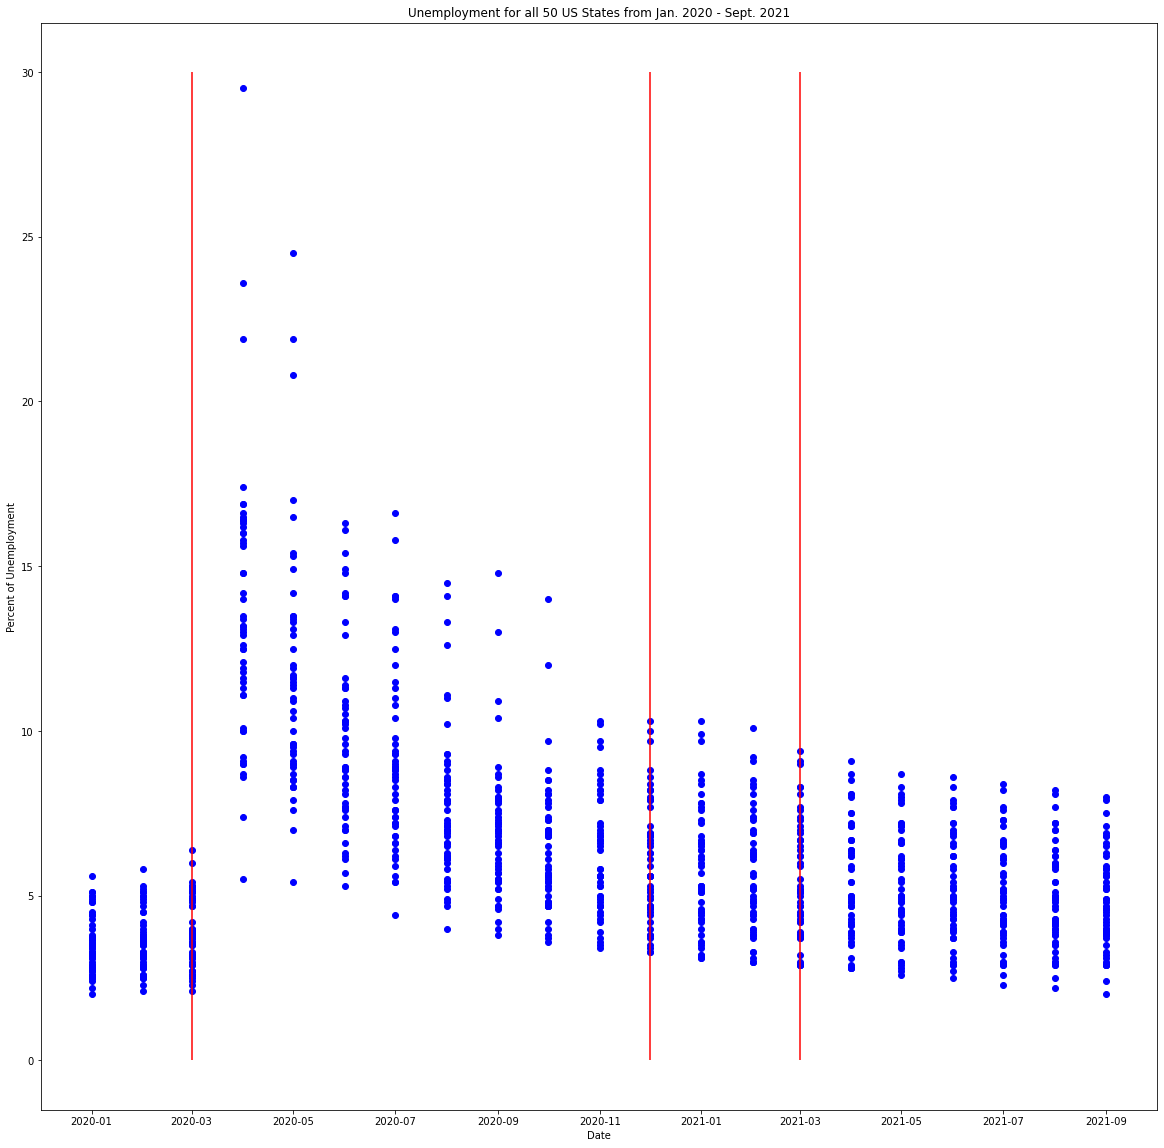

In [15]:
#Visualization created to represent the change in unemployment for all 50 States across
#time of project scope, 3 red lines represent the dates the COVID-19 stimulus checks
#were distributed. First line would be first check, second line would be second check, etc

xtseries = US_Master_data.Date.values
ytseries = US_Master_data['Avg Unemployed Percent of Labor Force']


fig, tseries  = plt.subplots(figsize = (20, 20))
tseries.scatter(xtseries, ytseries,
               color = 'blue')
tseries.vlines(x = '2020-03-01', ymin = 0, ymax = 30, color = 'red' )
tseries.vlines(x = '2020-12-01', ymin = 0, ymax = 30, color = 'red' )
tseries.vlines(x = '2021-03-01', ymin = 0, ymax = 30, color = 'red' )


tseries.set(xlabel = 'Date', ylabel = 'Percent of Unemployment',
title = 'Unemployment for all 50 US States from Jan. 2020 - Sept. 2021')
plt.show()

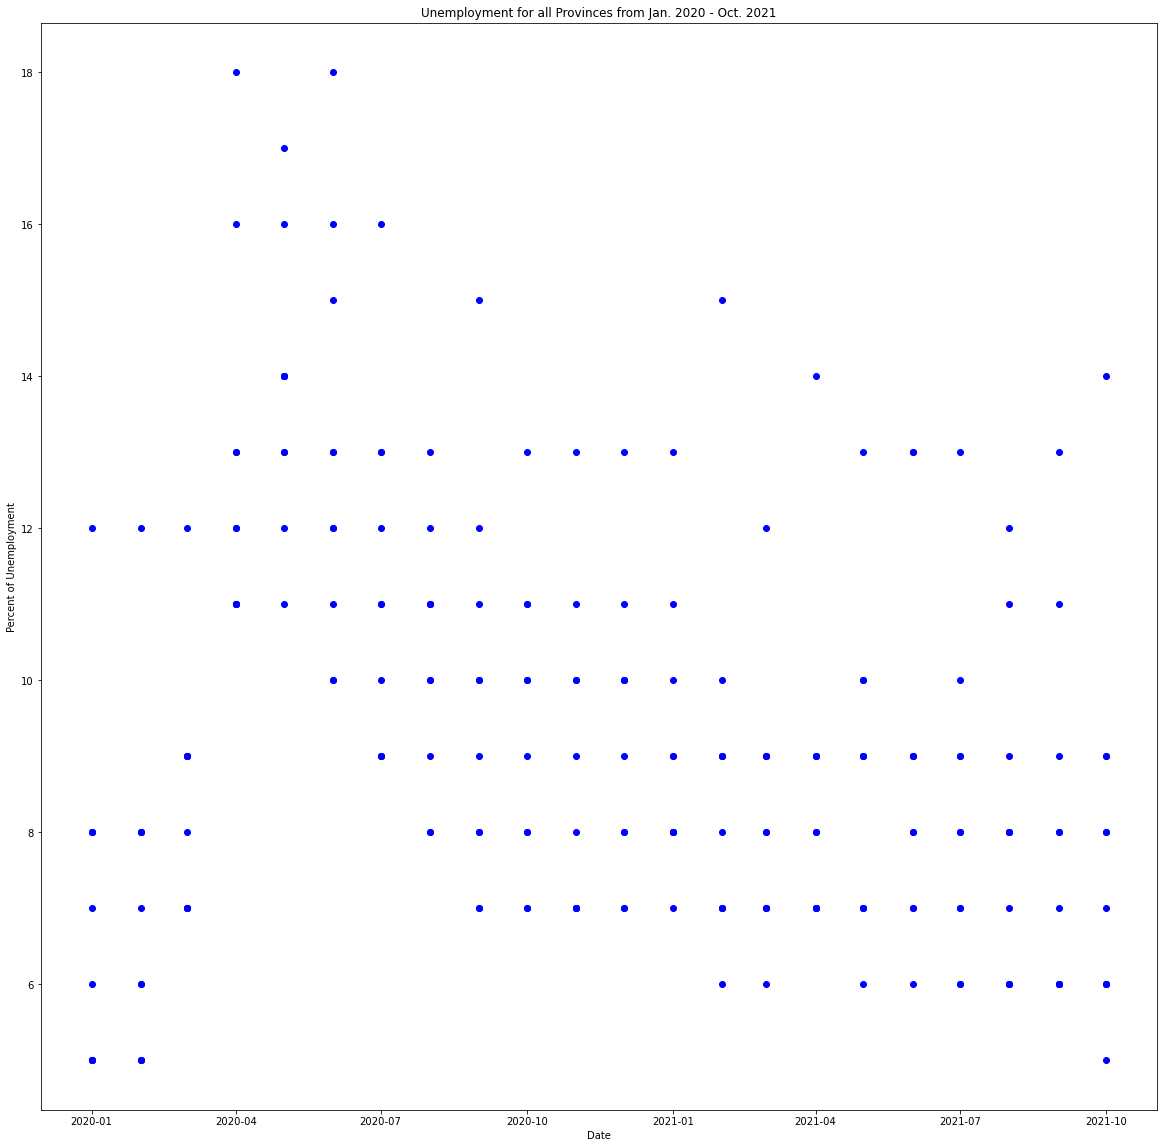

In [18]:
x_cantseries = Canada_Master_data.Date.values
y_cantseries = Canada_Master_data['Avg Unemployed Rate']


fig, can_tseries  = plt.subplots(figsize = (20, 20))
can_tseries.scatter(x_cantseries, y_cantseries,
               color = 'blue')
#can_tseries.vlines(x = '2020-03-01', ymin = 0, ymax = 30, color = 'red' )
#can_tseries.vlines(x = '2020-12-01', ymin = 0, ymax = 30, color = 'red' )
#can_tseries.vlines(x = '2021-03-01', ymin = 0, ymax = 30, color = 'red' )


can_tseries.set(xlabel = 'Date', ylabel = 'Percent of Unemployment',
title = 'Unemployment for all Provinces from Jan. 2020 - Oct. 2021')
plt.show()

In [22]:
#Grouping by States, then summing up the amount of COVID cases and arranging in descending
#order
#Below that, I did the same thing but with province
state_groups = US_Master_data.groupby('State')
cum_covid_state = state_groups['Monthly new case'].sum().sort_values(ascending = False)

province_groups = Canada_Master_data.groupby('Province')
cum_covid_province = province_groups['Monthly new case'].sum().sort_values(ascending = False)
cum_covid_province

Province
Ontario                      599955
Quebec                       425960
Alberta                      323857
British Columbia             205952
Saskatchewan                  77664
Manitoba                      63592
Nova Scotia                    7354
New Brunswick                  6445
Newfoundland and Labrador      1992
Prince Edward Island            317
Name: Monthly new case, dtype: int64

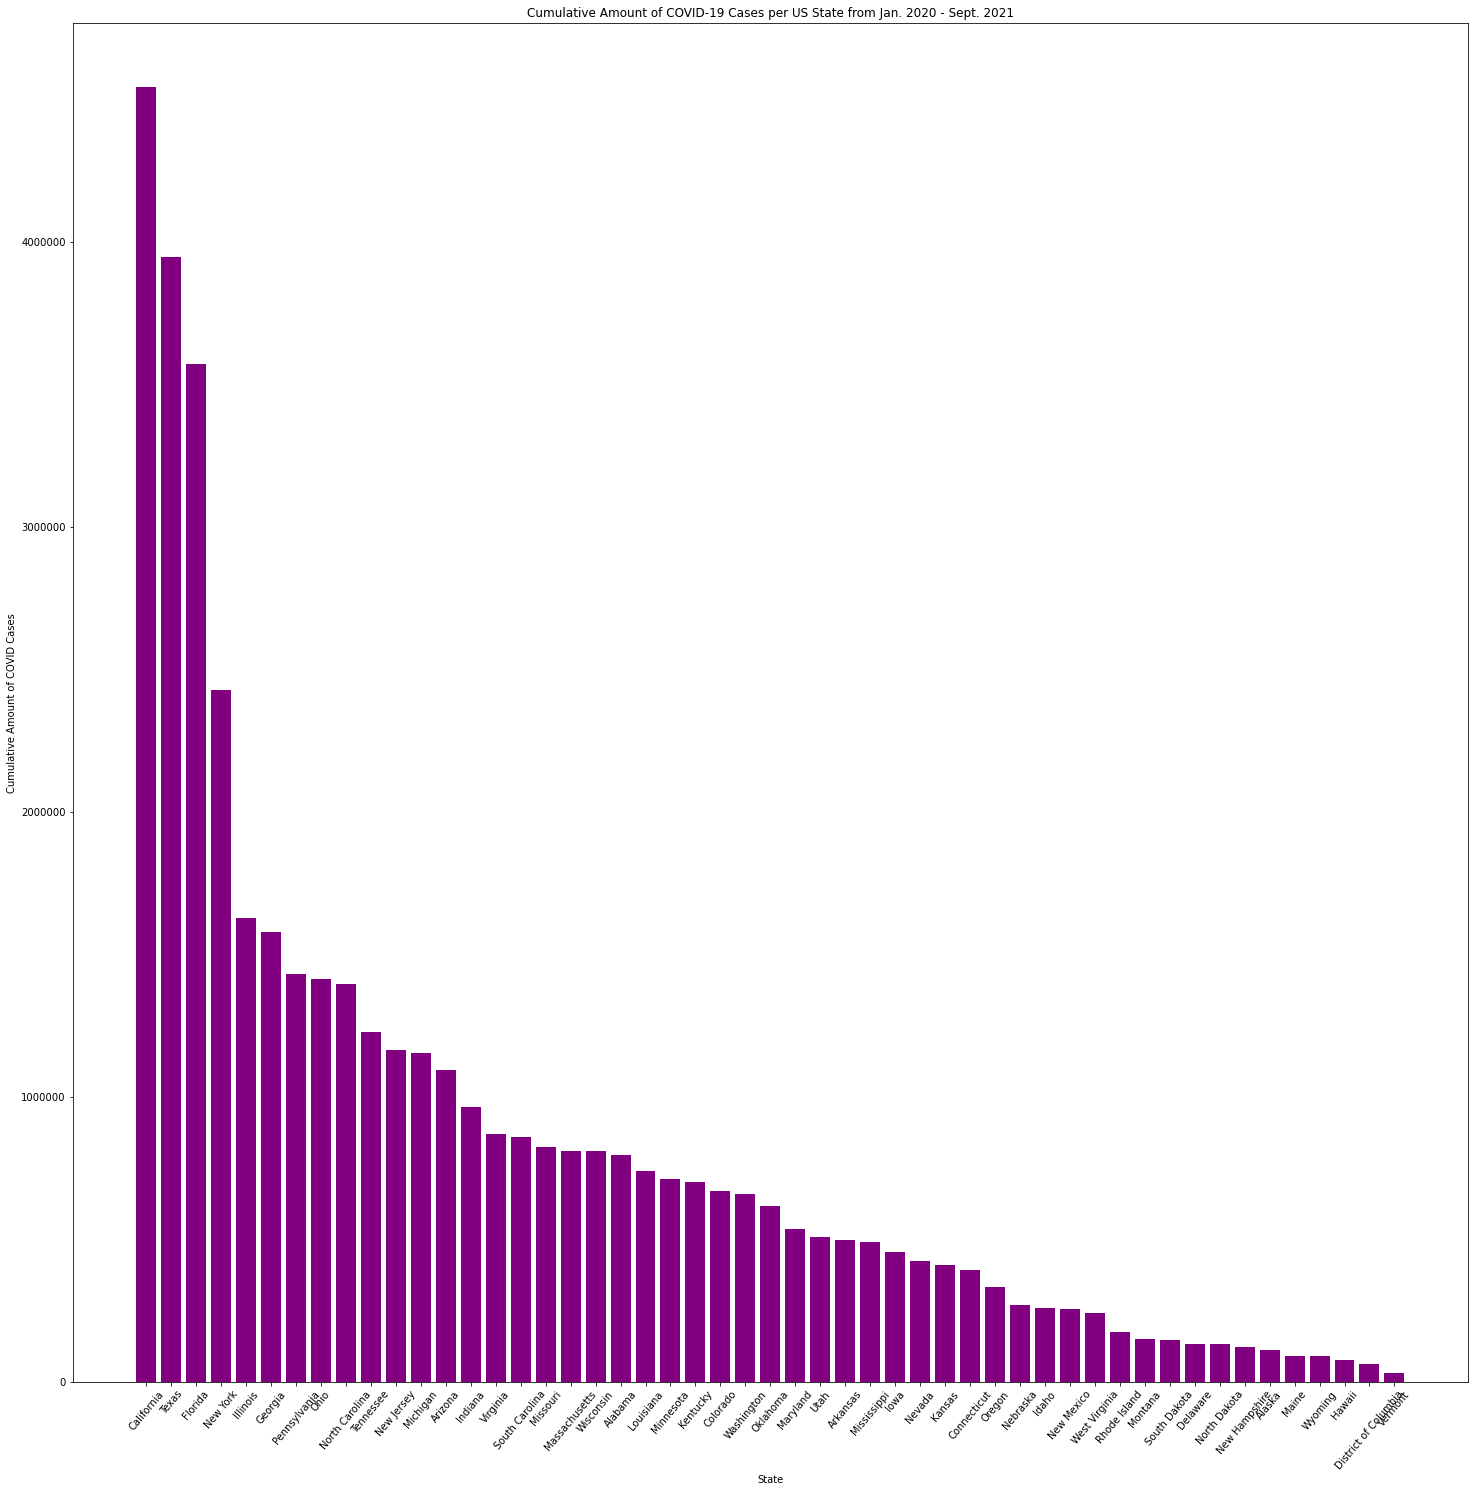

In [24]:
#Creating bar graph visuals to show variables previously made above;
#cum_covid_state & cum_covid_province

x_us = cum_covid_state.index
y_us = cum_covid_state
x_can = cum_covid_province.index
y_can = cum_covid_province


fig, us_covidbar  = plt.subplots(figsize = (25, 25))
us_covidbar.bar(x_us, y_us,
               color = 'purple')

us_covidbar.set(xlabel = 'State', ylabel = 'Cumulative Amount of COVID Cases',
title = 'Cumulative Amount of COVID-19 Cases per US State from Jan. 2020 - Sept. 2021')
plt.xticks(rotation = 50)
us_covidbar.ticklabel_format(style = 'plain', useOffset = False, axis = 'y')
plt.show()


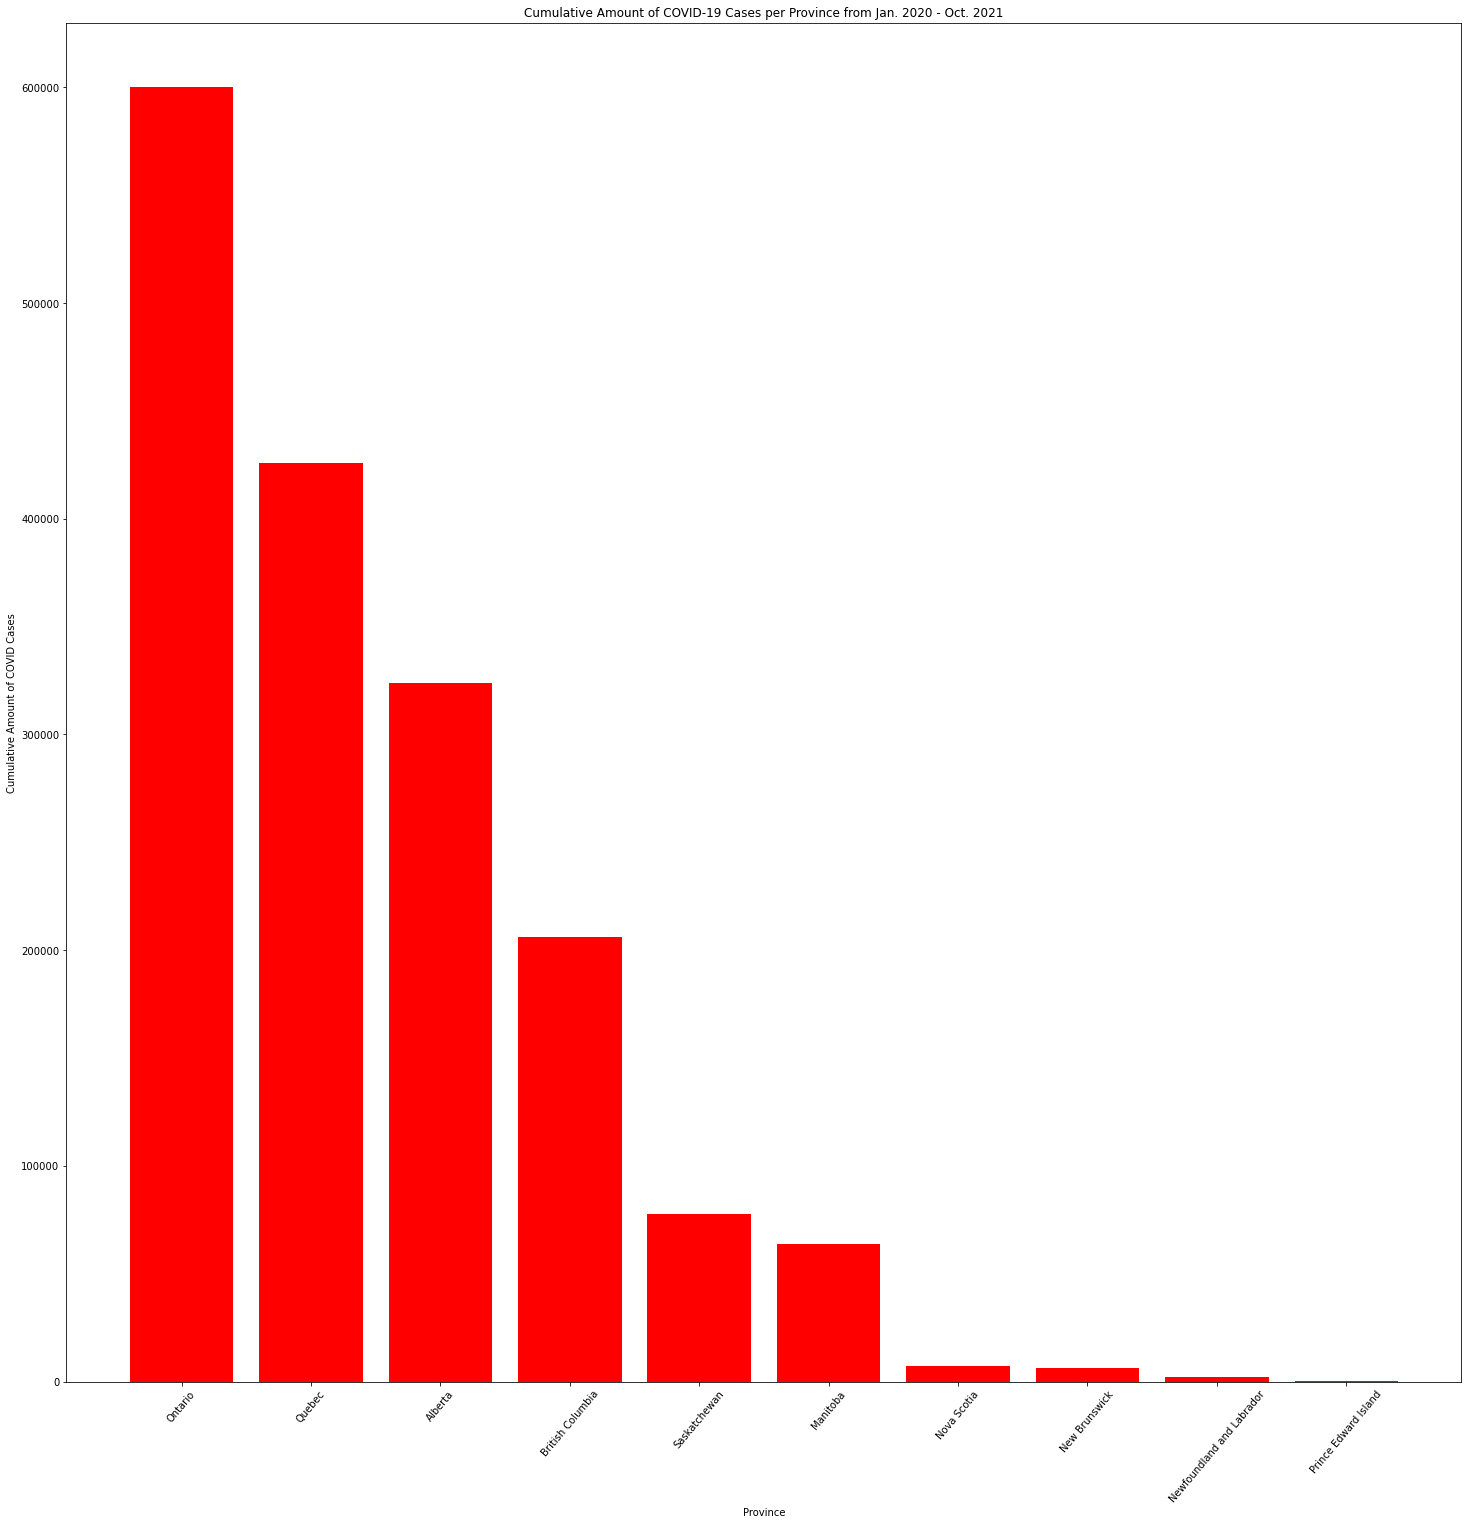

In [26]:
fig, can_covidbar  = plt.subplots(figsize = (25, 25))
can_covidbar.bar(x_can, y_can,
               color = 'red')

can_covidbar.set(xlabel = 'Province', ylabel = 'Cumulative Amount of COVID Cases',
title = 'Cumulative Amount of COVID-19 Cases per Province from Jan. 2020 - Oct. 2021')
plt.xticks(rotation = 50)
can_covidbar.ticklabel_format(style = 'plain', useOffset = False, axis = 'y')
plt.show()

